# Load files

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt

In [4]:
df_p = pd.read_csv("/content/drive/MyDrive/thesis_project_files/clean/all_P.csv")
df_r = pd.read_csv("/content/drive/MyDrive/thesis_project_files/clean/all_R.csv")

In [6]:
# list
R_labels=['additional info','confirm intention','debugging','encouragement','explain behavior','explain failure',
          'explain resources','identify failure','identify limitation','implement behavior','introduce background',
          'prepare demonstration', 'prompt action', 'prompt clarification','prompt evaluation',
          'prompt resources clarification','propose action','propose approximation',
          'propose choice', 'provide clarification','provide opinion','refer to resources',
          'refer to simulation', 'resources - setup limitation', 'robot limitation', 'summarize discussion','time management']

P_labels=['accept clarification','accept suggestion','anthropomorphize',
          'ask for clarification',' call for discussion','choose behavior',
          'clarification reasoning', 'ethical concern', 'explain proposed behavior',
          'identify failure','identify limitation','inappropriate behavior','indifferent',
          'interaction - engagement failure','liability concern', 'performance failure',
          'positive','propose action','propose addition','propose behavior','propose fixes',
          'propose removal','propose replacement','propose role','refer to experience',
          'refer to simulation','resources - setup limitation','robot limitation','safety concern',
          'social context','spatial context','unexpected behavior','unsuitable goal','user context']

In [7]:
def exclude(df, labels):
  exclude_idx=[]
  for d in range(0, len(df['label'])):
      if  df['label'][d] not in labels:
          exclude_idx.append(d)
  return df.drop(index=(exclude_idx))


df_r=exclude(df_r, R_labels)
df_p=exclude(df_p, P_labels)

In [8]:
df_p['index']=df_p['label'].apply(P_labels.index)
df_r['index']=df_r['label'].apply(R_labels.index)

In [9]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True')
  plt.xlabel('Predicted');

# zero-shot pipeline

In [10]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from transformers import *

def model_pipeline(model_name, df, candidate_labels):

  classifier=pipeline("zero-shot-classification",model=model_name)

  predict=[]
  true=[]
  for i in tqdm(range(0, len(df))):
    text = df.iloc[i,]['text']
    cat = df.iloc[i,]['label']
    res = classifier(text, candidate_labels, multi_label=False)
    labels = res['labels'][0]

    predict.append(labels)
    true.append(cat)

  cm = confusion_matrix(true, predict)
  df_cm = pd.DataFrame(cm, index=candidate_labels, columns=candidate_labels)
  show_confusion_matrix(df_cm)

  return(classification_report(true, predict, target_names=candidate_labels))

/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_flax_utils.py:24: FutureWarning: Importing `FlaxGenerationMixin` from `src/transformers/generation_flax_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import FlaxGenerationMixin` instead.
  warnings.warn(
Xformers is not installed correctly. If you want to use memory_efficient_attentio

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--typeform--distilbert-base-uncased-mnli/snapshots/cfa538a0fddbbd978fefe8966c1aeff7ad409c90/config.json
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
Model config DistilBertConfig {
  "_name_or_path": "typeform/distilbert-base-uncased-mnli",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "finetuning_task": "mnli",
  "hidden_dim": 3072,
  "id2label": {
    "0": "ENTAILMENT",
    "1": "NEUTRAL",
    "2": "CONTRADICTION"
  },
  "initializer_range": 0.02,
  "label2id": {
    "CONTRADICTION": 2,
    "ENTAILMENT": 0,
    "NEUTRAL": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0

loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--typeform--distilbert-base-uncased-mnli/snapshots/cfa538a0fddbbd978fefe8966c1aeff7ad409c90/model.safetensors
All model checkpoint weights were used when initializing DistilBertForSequenceClassification.

All the weights of DistilBertForSequenceClassification were initialized from the model checkpoint at typeform/distilbert-base-uncased-mnli.
If your task is similar to the task the model of the checkpoint was trained on, you can already use DistilBertForSequenceClassification for predictions without further training.


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--typeform--distilbert-base-uncased-mnli/snapshots/cfa538a0fddbbd978fefe8966c1aeff7ad409c90/config.json
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
Model config DistilBertConfig {
  "_name_or_path": "typeform/distilbert-base-uncased-mnli",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "finetuning_task": "mnli",
  "hidden_dim": 3072,
  "id2label": {
    "0": "ENTAILMENT",
    "1": "NEUTRAL",
    "2": "CONTRADICTION"
  },
  "initializer_range": 0.02,
  "label2id": {
    "CONTRADICTION": 2,
    "ENTAILMENT": 0,
    "NEUTRAL": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--typeform--distilbert-base-uncased-mnli/snapshots/cfa538a0fddbbd978fefe8966c1aeff7ad409c90/vocab.txt
loading file tokenizer.json from cache at None
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--typeform--distilbert-base-uncased-mnli/snapshots/cfa538a0fddbbd978fefe8966c1aeff7ad409c90/special_tokens_map.json
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--typeform--distilbert-base-uncased-mnli/snapshots/cfa538a0fddbbd978fefe8966c1aeff7ad409c90/tokenizer_config.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--typeform--distilbert-base-uncased-mnli/snapshots/cfa538a0fddbbd978fefe8966c1aeff7ad409c90/config.json
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.jso

'                                  precision    recall  f1-score   support\n\n            accept clarification       0.00      0.00      0.00         0\n               accept suggestion       0.02      0.20      0.03        15\n                anthropomorphize       0.06      0.02      0.03        44\n           ask for clarification       0.00      0.00      0.00        38\n             call for discussion       0.17      0.52      0.26       157\n                 choose behavior       0.02      0.09      0.03        11\n         clarification reasoning       0.00      0.00      0.00        49\n                 ethical concern       0.00      0.00      0.00        13\n       explain proposed behavior       0.04      0.11      0.06        55\n                identify failure       0.00      0.00      0.00         1\n             identify limitation       0.00      0.20      0.01         5\n          inappropriate behavior       0.00      0.00      0.00        29\n                     i

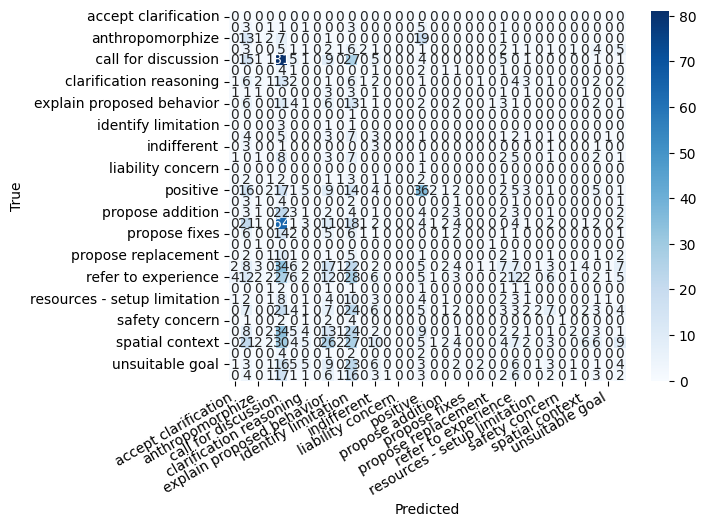

In [11]:
model_pipeline("typeform/distilbert-base-uncased-mnli", df_p, P_labels)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--typeform--distilbert-base-uncased-mnli/snapshots/cfa538a0fddbbd978fefe8966c1aeff7ad409c90/config.json
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
Model config DistilBertConfig {
  "_name_or_path": "typeform/distilbert-base-uncased-mnli",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "finetuning_task": "mnli",
  "hidden_dim": 3072,
  "id2label": {
    "0": "ENTAILMENT",
    "1": "NEUTRAL",
    "2": "CONTRADICTION"
  },
  "initializer_range": 0.02,
  "label2id": {
    "CONTRADICTION": 2,
    "ENTAILMENT": 0,
    "NEUTRAL": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0

'                                precision    recall  f1-score   support\n\n               additional info       0.00      0.00      0.00         2\n             confirm intention       0.06      0.02      0.03        95\n                     debugging       0.00      0.00      0.00        40\n                 encouragement       0.10      0.05      0.07        62\n              explain behavior       0.20      0.04      0.06       320\n               explain failure       0.00      0.00      0.00         2\n             explain resources       0.00      0.00      0.00       162\n              identify failure       0.33      0.05      0.08        42\n           identify limitation       0.01      0.38      0.01         8\n            implement behavior       0.04      0.06      0.05       108\n          introduce background       0.00      0.00      0.00        48\n         prepare demonstration       0.20      0.02      0.04       135\n                 prompt action       0.00      0

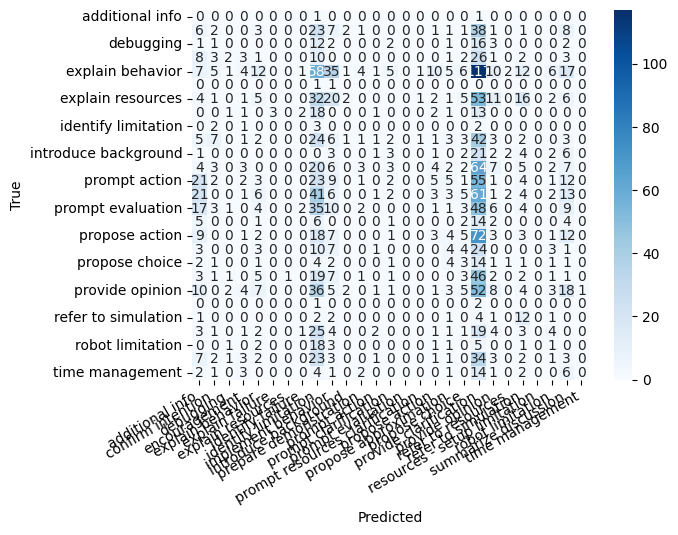

In [ ]:
model_pipeline("typeform/distilbert-base-uncased-mnli", df_r, R_labels)